In [7]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_excel('./Opportunities.xlsx')

In [5]:
df

,Opportunity ID,Business Account,Contact ID,Estimated Close Date,Status,Stage,Probability,Estimated amount,Amount received,Difference,...,Theorical payment amount 3,Theorical payment date 4,Theorical payment amount 4,Theorical payment date 5,Theorical payment amount 5,Created On,Last Modified Date,Actual Close Date,Assignment Date,Branch ID
0,6387,C00037,35334.0,2023-11-27,New,Won,100,9000.0,NaN,-9000.0,...,NaN,NaT,NaN,NaT,NaN,2023-10-11 10:59:07.310,2023-10-11 10:59:07.310,NaT,2023-10-11 10:58:16.137,SDLV
1,6386,C01254,36240.0,2023-10-11,New,Won,100,9000.0,NaN,-9000.0,...,NaN,NaT,NaN,NaT,NaN,2023-10-11 10:55:50.773,2023-10-11 10:55:50.773,NaT,2023-10-11 10:53:26.857,SDLV
2,6385,C21512,47640.0,2023-10-11,New,Oral agreement,80,140.0,NaN,-140.0,...,NaN,NaT,NaN,NaT,NaN,2023-10-11 08:53:52.533,2023-10-11 08:54:37.860,NaT,2023-10-11 08:52:52.257,SDLV
3,6384,C21509,47636.0,2023-10-11,New,Oral agreement,80,350.0,NaN,-350.0,...,NaN,NaT,NaN,NaT,NaN,2023-10-11 08:42:41.140,2023-10-11 08:42:41.140,NaT,2023-10-11 08:41:27.513,SDLV
4,6383,C21508,47635.0,2023-10-10,New,Oral agreement,80,120.0,NaN,-120.0,...,NaN,NaT,NaN,NaT,NaN,2023-10-10 15:54:31.827,2023-10-10 15:56:12.527,NaT,2023-10-10 15:53:17.550,SDLV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,5,C00036,NaN,2020-01-01,Won,Won,100,1059.0,NaN,-1059.0,...,NaN,NaT,NaN,NaT,NaN,2021-02-12 06:10:11.650,2022-12-14 09:45:10.033,2022-12-14,2021-02-12 06:10:11.487,SDLV
5982,4,C00024,NaN,2020-01-01,Won,Won,200,7500.0,7500.0,0.0,...,NaN,NaT,NaN,NaT,NaN,2021-02-12 06:10:11.167,2021-11-17 15:22:01.390,2021-11-17,2021-02-12 06:10:09.940,SDLV
5983,3,C00011,NaN,2020-01-01,Won,Won,100,35000.0,NaN,-35000.0,...,NaN,NaT,NaN,NaT,NaN,2021-02-12 06:10:09.633,2021-03-19 07:01:54.480,2021-03-19,2021-02-12 06:10:09.520,SDLV
5984,2,C00331,NaN,2020-01-01,Won,Won,100,20000.0,NaN,-20000.0,...,NaN,NaT,NaN,NaT,NaN,2021-02-12 06:10:09.020,2021-08-25 11:52:18.820,2021-08-25,NaT,SDLV


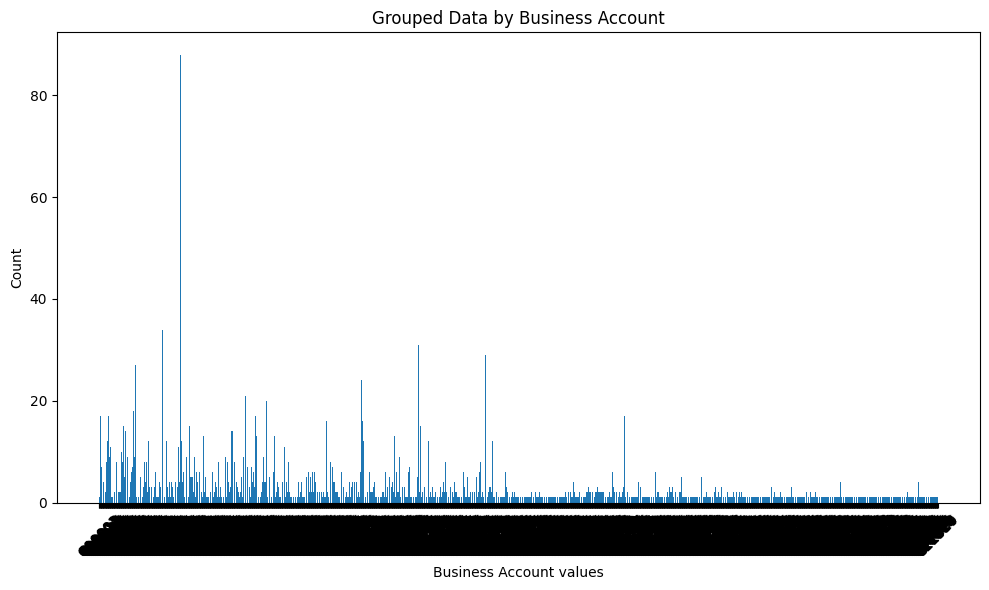

In [8]:
grouped_data = df.groupby('Business Account').size().reset_index(name='count')

# Create a bar chart to visualize the grouped data
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Business Account'], grouped_data['count'])
plt.xlabel('Business Account values')
plt.ylabel('Count')
plt.title('Grouped Data by Business Account')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()

In [12]:
# Group the original DataFrame by the 'Stage' column
stage = df.groupby('Stage').size().reset_index(name='Count')

In [13]:
stage

,Stage,Count
0,Advanced Prospect,106
1,Dossier posed,118
2,Initial Prospect,545
3,Lost,34
4,Oral agreement,1081
5,Won,4102


In [14]:
# Group the original DataFrame by the 'Stage' column
status = df.groupby('Status').size().reset_index(name='Count')

In [15]:
status

,Status,Count
0,Lost,271
1,New,1500
2,Open,107
3,Won,4108


In [16]:
# Group the original DataFrame by the 'Stage' column
business_account = df.groupby('Business Account').size().reset_index(name='Count')

In [17]:
business_account

,Business Account,Count
0,C00001,4
1,C00002,1
2,C00004,4
3,C00005,1
4,C00011,17
...,...,...
2058,C21527,1
2059,C21528,1
2060,C21529,1
2061,C21530,1


In [18]:
business_account = business_account.sort_values(by='Count', ascending=False)

In [20]:
business_account

,Business Account,Count
200,C00366,88
56,C00094,41
362,C00644,39
568,C01196,35
156,C00290,34
...,...,...
1102,C06225,1
1101,C06224,1
1100,C06223,1
1099,C06222,1


In [21]:
summary_stats = business_account['Count'].describe()

In [22]:
summary_stats

count    2063.000000
mean        2.900630
std         4.448576
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        88.000000
Name: Count, dtype: float64

In [25]:
# Create a dictionary to map 'status' values to their corresponding weights
status_weights = {'Won': 1.0, 'Open': 0.8, 'New': 0.6, 'Lost': 0.4}

# Use the 'apply' function to create the 'status_weight' column
df['status_weight'] = df['Status'].apply(lambda status: status_weights.get(status, 0.0))


In [26]:
df

,Opportunity ID,Business Account,Contact ID,Estimated Close Date,Status,Stage,Probability,Estimated amount,Amount received,Difference,...,Theorical payment date 4,Theorical payment amount 4,Theorical payment date 5,Theorical payment amount 5,Created On,Last Modified Date,Actual Close Date,Assignment Date,Branch ID,status_weight
0,6387,C00037,35334.0,2023-11-27,New,Won,100,9000.0,NaN,-9000.0,...,NaT,NaN,NaT,NaN,2023-10-11 10:59:07.310,2023-10-11 10:59:07.310,NaT,2023-10-11 10:58:16.137,SDLV,0.6
1,6386,C01254,36240.0,2023-10-11,New,Won,100,9000.0,NaN,-9000.0,...,NaT,NaN,NaT,NaN,2023-10-11 10:55:50.773,2023-10-11 10:55:50.773,NaT,2023-10-11 10:53:26.857,SDLV,0.6
2,6385,C21512,47640.0,2023-10-11,New,Oral agreement,80,140.0,NaN,-140.0,...,NaT,NaN,NaT,NaN,2023-10-11 08:53:52.533,2023-10-11 08:54:37.860,NaT,2023-10-11 08:52:52.257,SDLV,0.6
3,6384,C21509,47636.0,2023-10-11,New,Oral agreement,80,350.0,NaN,-350.0,...,NaT,NaN,NaT,NaN,2023-10-11 08:42:41.140,2023-10-11 08:42:41.140,NaT,2023-10-11 08:41:27.513,SDLV,0.6
4,6383,C21508,47635.0,2023-10-10,New,Oral agreement,80,120.0,NaN,-120.0,...,NaT,NaN,NaT,NaN,2023-10-10 15:54:31.827,2023-10-10 15:56:12.527,NaT,2023-10-10 15:53:17.550,SDLV,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,5,C00036,NaN,2020-01-01,Won,Won,100,1059.0,NaN,-1059.0,...,NaT,NaN,NaT,NaN,2021-02-12 06:10:11.650,2022-12-14 09:45:10.033,2022-12-14,2021-02-12 06:10:11.487,SDLV,1.0
5982,4,C00024,NaN,2020-01-01,Won,Won,200,7500.0,7500.0,0.0,...,NaT,NaN,NaT,NaN,2021-02-12 06:10:11.167,2021-11-17 15:22:01.390,2021-11-17,2021-02-12 06:10:09.940,SDLV,1.0
5983,3,C00011,NaN,2020-01-01,Won,Won,100,35000.0,NaN,-35000.0,...,NaT,NaN,NaT,NaN,2021-02-12 06:10:09.633,2021-03-19 07:01:54.480,2021-03-19,2021-02-12 06:10:09.520,SDLV,1.0
5984,2,C00331,NaN,2020-01-01,Won,Won,100,20000.0,NaN,-20000.0,...,NaT,NaN,NaT,NaN,2021-02-12 06:10:09.020,2021-08-25 11:52:18.820,2021-08-25,NaT,SDLV,1.0


In [27]:
# Create a dictionary to map 'status' values to their corresponding weights
stage_weights = {'Won': 1.0, 'Oral agreement': 0.8, 'Advanced prospect': 0.6, 'Initial Prospect': 0.4, 'Dossier Posed': 0.2}

# Use the 'apply' function to create the 'status_weight' column
df['stage_weight'] = df['Stage'].apply(lambda stage: stage_weights.get(stage, 0.0))

In [28]:
df

,Opportunity ID,Business Account,Contact ID,Estimated Close Date,Status,Stage,Probability,Estimated amount,Amount received,Difference,...,Theorical payment amount 4,Theorical payment date 5,Theorical payment amount 5,Created On,Last Modified Date,Actual Close Date,Assignment Date,Branch ID,status_weight,stage_weight
0,6387,C00037,35334.0,2023-11-27,New,Won,100,9000.0,NaN,-9000.0,...,NaN,NaT,NaN,2023-10-11 10:59:07.310,2023-10-11 10:59:07.310,NaT,2023-10-11 10:58:16.137,SDLV,0.6,1.0
1,6386,C01254,36240.0,2023-10-11,New,Won,100,9000.0,NaN,-9000.0,...,NaN,NaT,NaN,2023-10-11 10:55:50.773,2023-10-11 10:55:50.773,NaT,2023-10-11 10:53:26.857,SDLV,0.6,1.0
2,6385,C21512,47640.0,2023-10-11,New,Oral agreement,80,140.0,NaN,-140.0,...,NaN,NaT,NaN,2023-10-11 08:53:52.533,2023-10-11 08:54:37.860,NaT,2023-10-11 08:52:52.257,SDLV,0.6,0.8
3,6384,C21509,47636.0,2023-10-11,New,Oral agreement,80,350.0,NaN,-350.0,...,NaN,NaT,NaN,2023-10-11 08:42:41.140,2023-10-11 08:42:41.140,NaT,2023-10-11 08:41:27.513,SDLV,0.6,0.8
4,6383,C21508,47635.0,2023-10-10,New,Oral agreement,80,120.0,NaN,-120.0,...,NaN,NaT,NaN,2023-10-10 15:54:31.827,2023-10-10 15:56:12.527,NaT,2023-10-10 15:53:17.550,SDLV,0.6,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,5,C00036,NaN,2020-01-01,Won,Won,100,1059.0,NaN,-1059.0,...,NaN,NaT,NaN,2021-02-12 06:10:11.650,2022-12-14 09:45:10.033,2022-12-14,2021-02-12 06:10:11.487,SDLV,1.0,1.0
5982,4,C00024,NaN,2020-01-01,Won,Won,200,7500.0,7500.0,0.0,...,NaN,NaT,NaN,2021-02-12 06:10:11.167,2021-11-17 15:22:01.390,2021-11-17,2021-02-12 06:10:09.940,SDLV,1.0,1.0
5983,3,C00011,NaN,2020-01-01,Won,Won,100,35000.0,NaN,-35000.0,...,NaN,NaT,NaN,2021-02-12 06:10:09.633,2021-03-19 07:01:54.480,2021-03-19,2021-02-12 06:10:09.520,SDLV,1.0,1.0
5984,2,C00331,NaN,2020-01-01,Won,Won,100,20000.0,NaN,-20000.0,...,NaN,NaT,NaN,2021-02-12 06:10:09.020,2021-08-25 11:52:18.820,2021-08-25,NaT,SDLV,1.0,1.0


In [35]:
df['combintaed_weights'] = df['status_weight'] * df['stage_weight']

In [36]:
df

,Opportunity ID,Business Account,Contact ID,Estimated Close Date,Status,Stage,Probability,Estimated amount,Amount received,Difference,...,Theorical payment date 5,Theorical payment amount 5,Created On,Last Modified Date,Actual Close Date,Assignment Date,Branch ID,status_weight,stage_weight,combintaed_weights
0,6387,C00037,35334.0,2023-11-27,New,Won,100,9000.0,NaN,-9000.0,...,NaT,NaN,2023-10-11 10:59:07.310,2023-10-11 10:59:07.310,NaT,2023-10-11 10:58:16.137,SDLV,0.6,1.0,0.60
1,6386,C01254,36240.0,2023-10-11,New,Won,100,9000.0,NaN,-9000.0,...,NaT,NaN,2023-10-11 10:55:50.773,2023-10-11 10:55:50.773,NaT,2023-10-11 10:53:26.857,SDLV,0.6,1.0,0.60
2,6385,C21512,47640.0,2023-10-11,New,Oral agreement,80,140.0,NaN,-140.0,...,NaT,NaN,2023-10-11 08:53:52.533,2023-10-11 08:54:37.860,NaT,2023-10-11 08:52:52.257,SDLV,0.6,0.8,0.48
3,6384,C21509,47636.0,2023-10-11,New,Oral agreement,80,350.0,NaN,-350.0,...,NaT,NaN,2023-10-11 08:42:41.140,2023-10-11 08:42:41.140,NaT,2023-10-11 08:41:27.513,SDLV,0.6,0.8,0.48
4,6383,C21508,47635.0,2023-10-10,New,Oral agreement,80,120.0,NaN,-120.0,...,NaT,NaN,2023-10-10 15:54:31.827,2023-10-10 15:56:12.527,NaT,2023-10-10 15:53:17.550,SDLV,0.6,0.8,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,5,C00036,NaN,2020-01-01,Won,Won,100,1059.0,NaN,-1059.0,...,NaT,NaN,2021-02-12 06:10:11.650,2022-12-14 09:45:10.033,2022-12-14,2021-02-12 06:10:11.487,SDLV,1.0,1.0,1.00
5982,4,C00024,NaN,2020-01-01,Won,Won,200,7500.0,7500.0,0.0,...,NaT,NaN,2021-02-12 06:10:11.167,2021-11-17 15:22:01.390,2021-11-17,2021-02-12 06:10:09.940,SDLV,1.0,1.0,1.00
5983,3,C00011,NaN,2020-01-01,Won,Won,100,35000.0,NaN,-35000.0,...,NaT,NaN,2021-02-12 06:10:09.633,2021-03-19 07:01:54.480,2021-03-19,2021-02-12 06:10:09.520,SDLV,1.0,1.0,1.00
5984,2,C00331,NaN,2020-01-01,Won,Won,100,20000.0,NaN,-20000.0,...,NaT,NaN,2021-02-12 06:10:09.020,2021-08-25 11:52:18.820,2021-08-25,NaT,SDLV,1.0,1.0,1.00


In [37]:
business_account_by_combinated = df[['Business Account', 'combintaed_weights']]

In [38]:
business_account_by_combinated

,Business Account,combintaed_weights
0,C00037,0.60
1,C01254,0.60
2,C21512,0.48
3,C21509,0.48
4,C21508,0.48
...,...,...
5981,C00036,1.00
5982,C00024,1.00
5983,C00011,1.00
5984,C00331,1.00


In [39]:
business_account_by_combinated = business_account_by_combinated.sort_values(by='combintaed_weights', ascending=False)

In [40]:
business_account_by_combinated

,Business Account,combintaed_weights
5985,C00331,1.0
2550,C00045,1.0
4622,C00727,1.0
4621,C00728,1.0
2539,C01404,1.0
...,...,...
2567,C01502,0.0
1738,C00712,0.0
344,C01412,0.0
1015,C01257,0.0


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(business_account_by_combinated, *['combintaed_weights'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(business_account_by_combinated, *['combintaed_weights'], **{})
chart

In [41]:
mean_weighted_value = business_account_by_combinated.groupby('Business Account')['combintaed_weights'].mean().reset_index()

In [42]:
mean_weighted_value

,Business Account,combintaed_weights
0,C00001,0.790000
1,C00002,1.000000
2,C00004,0.900000
3,C00005,1.000000
4,C00011,0.887059
...,...,...
2058,C21527,0.240000
2059,C21528,0.240000
2060,C21529,0.240000
2061,C21530,0.240000


In [43]:
mean_weighted_value = mean_weighted_value.sort_values(by='combintaed_weights', ascending=False)

In [44]:
mean_weighted_value

,Business Account,combintaed_weights
589,C01225,1.0
522,C01075,1.0
524,C01083,1.0
942,C04297,1.0
941,C04294,1.0
...,...,...
1924,C19409,0.0
1782,C16559,0.0
1500,C12077,0.0
572,C01201,0.0


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(mean_weighted_value, *['combintaed_weights'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(mean_weighted_value, *['combintaed_weights'], **{})
chart

In [45]:
result_df = mean_weighted_value.merge(business_account, on='Business Account', how='inner')

In [46]:
result_df

,Business Account,combintaed_weights,Count
0,C01225,1.0,1
1,C01075,1.0,2
2,C01083,1.0,3
3,C04297,1.0,1
4,C04294,1.0,2
...,...,...,...
2058,C19409,0.0,1
2059,C16559,0.0,1
2060,C12077,0.0,1
2061,C01201,0.0,3


In [47]:
def calculate_score(count):
    if count > 40:
        return 1.0
    elif 20 <= count <= 40:
        return 0.8
    elif 10 <= count < 20:
        return 0.6
    else:
        return 0.4

In [50]:
result_df['score_count'] = result_df['Count'].apply(calculate_score)

In [51]:
result_df

,Business Account,combintaed_weights,Count,score,score_count
0,C01225,1.0,1,0.4,0.4
1,C01075,1.0,2,0.4,0.4
2,C01083,1.0,3,0.4,0.4
3,C04297,1.0,1,0.4,0.4
4,C04294,1.0,2,0.4,0.4
...,...,...,...,...,...
2058,C19409,0.0,1,0.4,0.4
2059,C16559,0.0,1,0.4,0.4
2060,C12077,0.0,1,0.4,0.4
2061,C01201,0.0,3,0.4,0.4


In [53]:
result_df['score'] = result_df['score_count'] * result_df['combintaed_weights']

In [54]:
result_df

,Business Account,combintaed_weights,Count,score,score_count
0,C01225,1.0,1,0.4,0.4
1,C01075,1.0,2,0.4,0.4
2,C01083,1.0,3,0.4,0.4
3,C04297,1.0,1,0.4,0.4
4,C04294,1.0,2,0.4,0.4
...,...,...,...,...,...
2058,C19409,0.0,1,0.0,0.4
2059,C16559,0.0,1,0.0,0.4
2060,C12077,0.0,1,0.0,0.4
2061,C01201,0.0,3,0.0,0.4


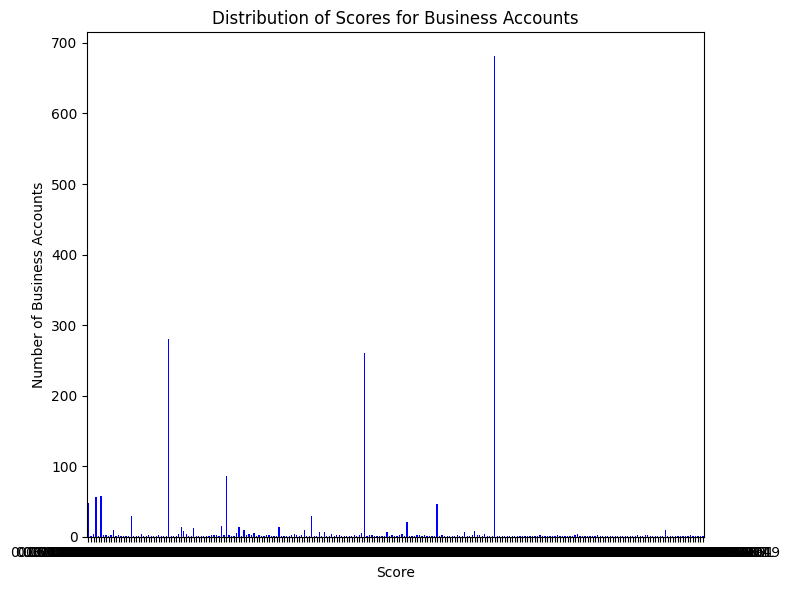

In [55]:
# Create a bar chart to visualize the distribution of scores
score_counts = result_df['score'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
score_counts.plot(kind='bar', color='blue')
plt.xlabel('Score')
plt.ylabel('Number of Business Accounts')
plt.title('Distribution of Scores for Business Accounts')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

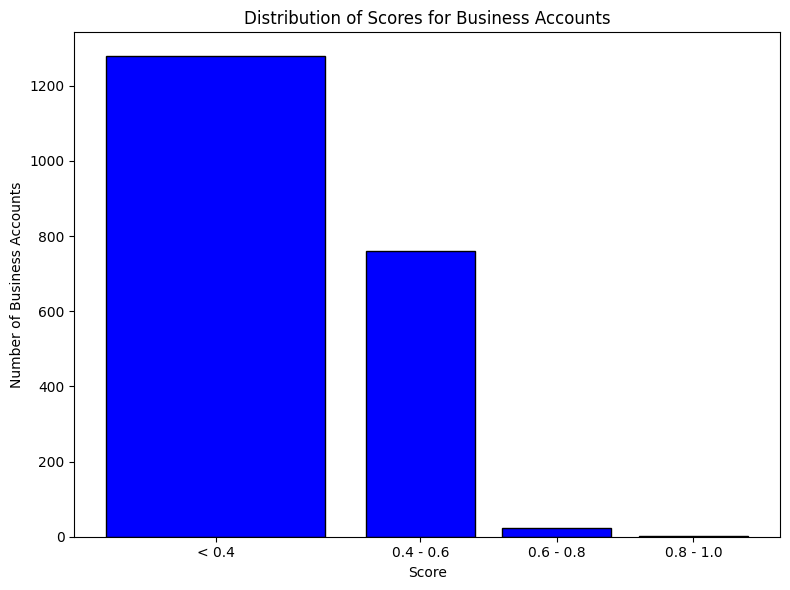

In [58]:
# Create a histogram to visualize the distribution of scores
plt.figure(figsize=(8, 6))
plt.hist(result_df['score'], bins=[0.0, 0.4, 0.6, 0.8, 1.0], rwidth=0.8, color='blue', edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Number of Business Accounts')
plt.title('Distribution of Scores for Business Accounts')
plt.xticks([0.2, 0.5, 0.7, 0.9], ['< 0.4', '0.4 - 0.6', '0.6 - 0.8', '0.8 - 1.0'])

plt.tight_layout()
plt.show()

In [59]:
df2 = pd.read_excel('./Business Account.xlsx')

In [60]:
df2

,Business Account,Customer Status,Type,Partner type,Class,Class Name,Activity sector,Parent Business Account,Owner Name,Follow-up with,Postal Code,City,State,Country ID,Country Name,Created On,Last Modified On
0,C00001,Active,Customer,Partner,02FONDA,Foundation,"HEALTH - SOCIAL - Social, Associations, Founda...",NaN,2.0,NaN,69009,LYON,NaN,FR,France,2021-02-02 15:35:10.183,2023-01-04 15:51:00.977
1,C00002,Active,Customer,NaN,NaN,NaN,NaN,NaN,13.0,NaN,69005,Lyon,NaN,FR,France,2021-02-02 15:35:11.213,2021-03-24 16:25:28.393
2,C00003,Active,Customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Non renseigné,NaN,FR,France,2021-02-02 15:35:11.457,2021-02-18 09:58:03.387
3,C00004,Active,Customer,Partner,01SIEGE,Headquarters,"BUSINESS ADMINISTRATION - Consulting, Audit, A...",NaN,12.0,NaN,75008,PARIS,NaN,FR,France,2021-02-02 15:35:11.770,2023-08-03 11:08:03.953
4,C00005,Active,Customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Non renseigné,NaN,FR,France,2021-02-02 15:35:12.013,2021-02-18 09:58:03.620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3478,C19916,Prospect,Business Account,Partner,01SIEGE,Headquarters,"MEDIA - ARTS - SPORTS - Sports, Infrastructure...",NaN,7.0,NaN,75019,Paris,NaN,FR,France,2023-07-03 17:18:35.647,2023-07-03 17:18:35.647
3479,C19917,Active,Customer,Prospect,01SIEGE,Headquarters,"HEALTH - SOCIAL - Social, Associations, Founda...",NaN,24.0,NaN,69800,Saint Priest,NaN,FR,France,2023-07-04 09:04:13.730,2023-07-24 15:25:42.843
3480,C19918,Prospect,Business Account,Prospect,01SIEGE,Headquarters,"COMMUNICATION - Marketing, Advertising, Commun...",NaN,NaN,NaN,NaN,Montréal - Paris - Toronto,NaN,FR,France,2023-07-04 10:29:57.430,2023-07-04 10:29:57.430
3481,C19986,Prospect,Business Account,Institutional partner,21ETAT,State,SECTEUR PUBLIC - Etat & ses établissements pub...,NaN,17.0,NaN,93008,Bobigny,NaN,FR,France,2023-07-05 15:37:58.080,2023-07-05 15:37:58.080


In [73]:
df_activity = df2[['Business Account', 'Activity sector']]
df_activity=df_activity.fillna("Other")

In [74]:
df_activity

,Business Account,Activity sector
0,C00001,"HEALTH - SOCIAL - Social, Associations, Founda..."
1,C00002,Other
2,C00003,Other
3,C00004,"BUSINESS ADMINISTRATION - Consulting, Audit, A..."
4,C00005,Other
...,...,...
3478,C19916,"MEDIA - ARTS - SPORTS - Sports, Infrastructure..."
3479,C19917,"HEALTH - SOCIAL - Social, Associations, Founda..."
3480,C19918,"COMMUNICATION - Marketing, Advertising, Commun..."
3481,C19986,SECTEUR PUBLIC - Etat & ses établissements pub...


In [85]:
result_df2 = df_activity.merge(result_df, on='Business Account', how="right")

In [86]:
result_df2

,Business Account,Activity sector,combintaed_weights,Count,score,score_count
0,C01225,"BUSINESS ADMINISTRATION - Consulting, Audit, A...",1.0,1,0.4,0.4
1,C01075,AGRI-FOOD - Food,1.0,2,0.4,0.4
2,C01083,"HR - RECRUITMENT - Recruitment agency, Interim...",1.0,3,0.4,0.4
3,C04297,"HEALTH - SOCIAL - Social, Associations, Founda...",1.0,1,0.4,0.4
4,C04294,Other,1.0,2,0.4,0.4
...,...,...,...,...,...,...
2058,C19409,TRANSPORT - Passenger transport,0.0,1,0.0,0.4
2059,C16559,"HEALTH - SOCIAL - Social, Associations, Founda...",0.0,1,0.0,0.4
2060,C12077,"INSURANCE - BANKING - Banking, Insurance, Fina...",0.0,1,0.0,0.4
2061,C01201,"PUBLIC SECTOR - Local authorities, Regions, Mu...",0.0,3,0.0,0.4


In [91]:
filtered_df = result_df2[result_df2['score'] >= 0.6]

# Extract the 'Activity sector' values from the filtered DataFrame
activity_sectors = filtered_df['Activity sector']

In [92]:
activity_sectors

391              TRANSPORT - Freight transport, logistics
431     HEALTH - SOCIAL - Social, Associations, Founda...
439     MEDIA - ARTS - SPORTS - Audiovisual, Media, Pu...
475                            HOTEL - CATERING - TOURISM
498               COMMERCE - Retail, Other retail, Crafts
502               INDUSTRIES - Metallurgy, Steel industry
589                        INDUSTRIES - Chemical industry
608                                                 Other
623              TRANSPORT - Freight transport, logistics
648              TRANSPORT - Freight transport, logistics
694     MEDIA - ARTS - SPORTS - Audiovisual, Media, Pu...
734                        COMPUTING - TELECOM - Networks
735               COMMERCE - Retail, Other retail, Crafts
736     INSURANCE - BANKING - Banking, Insurance, Fina...
739                               INDUSTRIES - Automotive
748                             HEALTH - SOCIAL - Medical
752                         HEALTH - SOCIAL - Paramedical
802           

In [93]:
sector_counts = activity_sectors.value_counts()


In [94]:
sector_counts

INSURANCE - BANKING - Banking, Insurance, Finance, Investment funds    4
TRANSPORT - Freight transport, logistics                               3
MEDIA - ARTS - SPORTS - Audiovisual, Media, Publishing                 2
COMMERCE - Retail, Other retail, Crafts                                2
HEALTH - SOCIAL - Medical                                              2
BTP - Construction                                                     2
HEALTH - SOCIAL - Social, Associations, Foundations                    1
HOTEL - CATERING - TOURISM                                             1
INDUSTRIES - Metallurgy, Steel industry                                1
INDUSTRIES - Chemical industry                                         1
Other                                                                  1
COMPUTING - TELECOM - Networks                                         1
INDUSTRIES - Automotive                                                1
HEALTH - SOCIAL - Paramedical                      

In [95]:
filtered_df

,Business Account,Activity sector,combintaed_weights,Count,score,score_count
391,C00690,"TRANSPORT - Freight transport, logistics",1.000000,21,0.800000,0.8
431,C00249,"HEALTH - SOCIAL - Social, Associations, Founda...",1.000000,15,0.600000,0.6
439,C00370,"MEDIA - ARTS - SPORTS - Audiovisual, Media, Pu...",1.000000,12,0.600000,0.6
475,C00357,HOTEL - CATERING - TOURISM,1.000000,10,0.600000,0.6
498,C00092,"COMMERCE - Retail, Other retail, Crafts",1.000000,10,0.600000,0.6
502,C00045,"INDUSTRIES - Metallurgy, Steel industry",1.000000,14,0.600000,0.6
589,C00630,INDUSTRIES - Chemical industry,1.000000,10,0.600000,0.6
608,C00593,Other,1.000000,14,0.600000,0.6
623,C00603,"TRANSPORT - Freight transport, logistics",1.000000,10,0.600000,0.6
648,C07718,"TRANSPORT - Freight transport, logistics",1.000000,17,0.600000,0.6


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(filtered_df, *['combintaed_weights'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(filtered_df, *['Count'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(filtered_df, *['score'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(filtered_df, *['score_count'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(filtered_df, *['combintaed_weights', 'Count'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(filtered_df, *['Count', 'score'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(filtered_df, *['score', 'score_count'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(filtered_df, *['combintaed_weights'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(filtered_df, *['Count'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(filtered_df, *['score'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(filtered_df, *['score_count'], **{})
chart

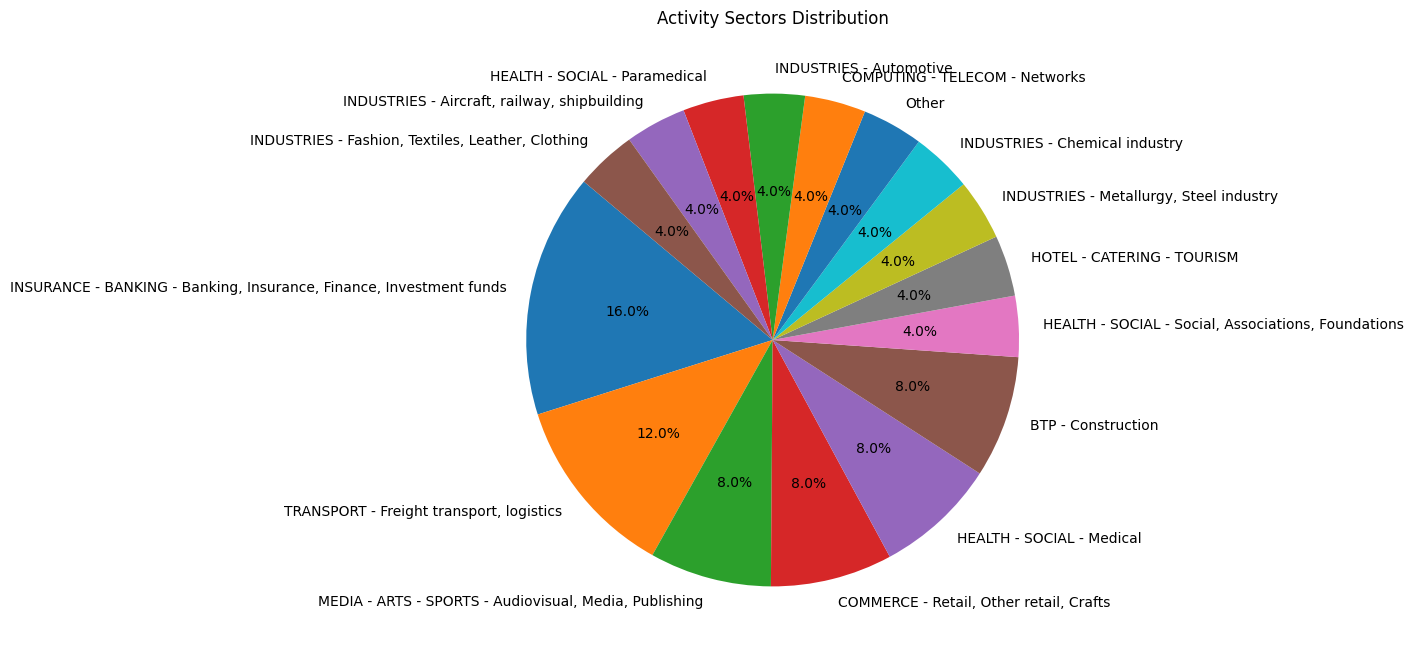

In [96]:
# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size if needed
plt.pie(sector_counts, labels=sector_counts.index, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Activity Sectors Distribution')

# Display the pie chart
plt.show()